In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
import pandas as pd

In [3]:
# Radon
mdnRnA = np.loadtxt('../mdnRnA.txt', delimiter=',')
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')
print('Dates from {} to {}'.format(dates[0], dates[-1]))

Dates from 2013-07-07 00:00:00 to 2019-07-21 00:00:00


In [4]:
test_size = int(0.3*len(mdnRnA))

In [5]:
print('Training size from: {} to {}'.format(dates[0], dates[-test_size]))
print('Test size from: {} to {}'.format(dates[-test_size], dates[-1]))

Training size from: 2013-07-07 00:00:00 to 2017-10-08 00:00:00
Test size from: 2017-10-08 00:00:00 to 2019-07-21 00:00:00


In [6]:
mdnRnA_completo = [90, 79, 99, 117, 99, 99, 86, 95, 93, 69, 87, 94, 74, 90, 76, 71, 87, 60, 72, 73, 77, 51, 66, 58, 63, 52.5, 67, 63, 78, 84, 69, 75, 77, 71, 82, 85, 82, 81.5, 94, 99, 97, 78, 93.5, 80, 92, 74, 71, 83, 70, 80, 86, 61, 77.7776073619632, 70, 83, 95, 82, 86, 83, 83, 82, 79, 101, 122, 100, 74, 70, 70, 70, 74, 73, 83, 66, 60, 66, 62, 60, 69, 67, 71, 68, 60, 68, 73, 66, 67, 72, 77, 67, 47, 68, 85.5, 84, 78, 89, 81, 61, 75, 99, 104, 83, 77.7776073619632, 62, 70, 91, 98, 103, 112, 105, 111, 109, 99, 110, 88, 82.5, 99, 81, 79, 72, 80, 75, 86, 77, 61, 56, 55, 66, 60, 71, 71, 74, 72, 54, 65, 74, 75, 76, 72, 69, 78.5, 67, 72, 63, 69, 87, 71, 71, 72.5, 75, 93, 89, 100, 96, 96, 101, 102, 70.5, 72, 74, 67, 68, 70, 65, 75.5, 72, 65, 80, 95, 94.5, 71, 84.5, 81, 78, 71, 66, 83, 85, 62, 73, 80, 69, 66, 63, 63, 69, 68, 78.5, 78, 78, 79, 67, 69, 82, 78, 61, 73.5, 70, 79, 81.5, 83, 90, 79, 99, 97, 95, 67, 79.5, 65, 80, 74, 70.5, 79, 78, 104, 77, 74, 87, 84, 94, 109, 91, 93.5, 95, 76, 72, 61, 57, 59, 70, 68, 82, 67, 69, 73, 76, 70, 57, 75, 63, 72, 64, 66, 70, 81, 68, 74, 72, 79, 84, 81, 69, 77, 74, 97, 103, 107, 88, 96, 101, 90, 106, 99, 104, 90, 80, 99, 100, 98, 85, 96, 84, 69, 57, 62, 85, 70, 67, 66, 62, 78, 70, 68, 66, 76, 71, 70, 63, 55, 54, 63, 65, 58, 58, 65, 69, 59, 69, 64, 83, 68, 82, 77, 66, 69, 70, 68, 63, 82, 82, 99, 93, 61, 76, 70.5, 63, 91, 102, 94, 103, 113.5, 73, 81, 109, 109, 90]
dates_completo = pd.date_range(startday, periods=len(mdnRnA_completo), freq='W')

/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


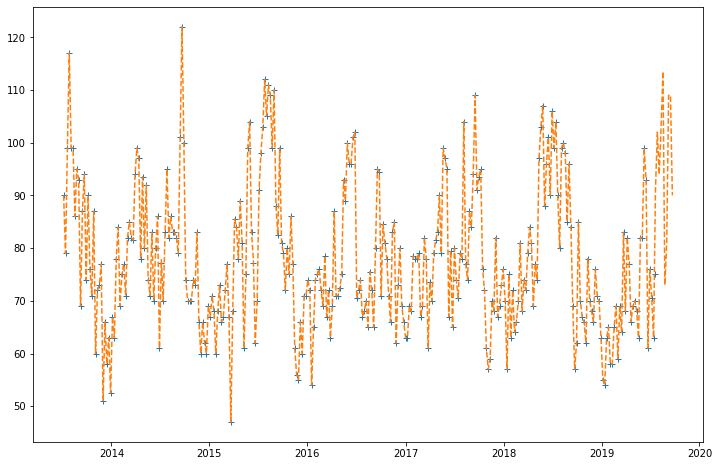

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(dates, mdnRnA, '+')
plt.plot(dates_completo, mdnRnA_completo, '--')

In [8]:
print('How many weeks there are in validation? ', len(mdnRnA_completo) - len(mdnRnA))

How many weeks there are in validation?  9


In [9]:
mdnRnA == mdnRnA_completo

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [13]:
mdnRnA[-test_size:]

array([ 95. ,  76. ,  72. ,  61. ,  57. ,  59. ,  70. ,  68. ,  82. ,
        67. ,  69. ,  73. ,  76. ,  70. ,  57. ,  75. ,  63. ,  72. ,
        64. ,  66. ,  70. ,  81. ,  68. ,  74. ,  72. ,  79. ,  84. ,
        81. ,  69. ,  77. ,  74. ,  97. , 103. , 107. ,  88. ,  96. ,
       101. ,  90. , 106. ,  99. , 104. ,  90. ,  80. ,  99. , 100. ,
        98. ,  85. ,  96. ,  84. ,  69. ,  57. ,  62. ,  85. ,  70. ,
        67. ,  66. ,  62. ,  78. ,  70. ,  68. ,  66. ,  76. ,  71. ,
        70. ,  63. ,  55. ,  54. ,  63. ,  65. ,  58. ,  58. ,  65. ,
        69. ,  59. ,  69. ,  64. ,  83. ,  68. ,  82. ,  77. ,  66. ,
        69. ,  70. ,  68. ,  63. ,  82. ,  82. ,  99. ,  93. ,  61. ,
        76. ,  70.5,  63. ,  75. ])

In [11]:
np.savetxt('../mdnRnA_validation.txt', mdnRnA_completo[-9:])

In [14]:
len(mdnRnA_completo[-9:])

9

In [16]:
dates_completo[-1]

Timestamp('2019-09-22 00:00:00', freq='W-SUN')